In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st


In [3]:
df=pd.read_csv('new_retail_data.csv')

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df.shape

(302010, 30)

In [6]:
df.head()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,...,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,...,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,...,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,...,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,...,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies


In [7]:
df.tail()

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,...,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,...,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,...,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,...,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,...,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand
302009,2882826.0,53626.0,Dustin Merritt,William14@gmail.com,9.518927e+09,143 Amanda Crescent,Tucson,West Virginia,25242.0,USA,...,2382.233417,Home Decor,Home Depot,Decorations,Average,Same-Day,Cash,Shipped,2.0,Clocks


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64
 16  Month             30

In [9]:
df.isnull().sum()

Transaction_ID      333
Customer_ID         308
Name                382
Email               347
Phone               362
Address             315
City                248
State               281
Zipcode             340
Country             271
Age                 173
Gender              317
Income              290
Customer_Segment    215
Date                359
Year                350
Month               273
Time                350
Total_Purchases     361
Amount              357
Total_Amount        350
Product_Category    283
Product_Brand       281
Product_Type          0
Feedback            184
Shipping_Method     337
Payment_Method      297
Order_Status        235
Ratings             184
products              0
dtype: int64

In [10]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
df[numerical_cols]=df[numerical_cols].fillna(df[numerical_cols].mean())

In [11]:
categorical_cols=df.select_dtypes(include=['object']).columns
for cat in categorical_cols:
    df[cat].fillna(df[cat].mode()[0],inplace=True)
#df[categorical_cols]=df[categorical_cols].fillna(df[numerical_cols].mode().iloc[0])



In [12]:
df.isnull().sum()

Transaction_ID      0
Customer_ID         0
Name                0
Email               0
Phone               0
Address             0
City                0
State               0
Zipcode             0
Country             0
Age                 0
Gender              0
Income              0
Customer_Segment    0
Date                0
Year                0
Month               0
Time                0
Total_Purchases     0
Amount              0
Total_Amount        0
Product_Category    0
Product_Brand       0
Product_Type        0
Feedback            0
Shipping_Method     0
Payment_Method      0
Order_Status        0
Ratings             0
products            0
dtype: int64

**handling invalid data**

In [13]:
df=df[(df['Total_Purchases']>=0) & (df['Amount']>=0)&(df['Total_Amount']>=0)]


**handling inconsistent data format**

In [14]:
df[numerical_cols]=df[numerical_cols].astype(int)
df.dtypes

Transaction_ID       int64
Customer_ID          int64
Name                object
Email               object
Phone                int64
Address             object
City                object
State               object
Zipcode              int64
Country             object
Age                  int64
Gender              object
Income              object
Customer_Segment    object
Date                object
Year                 int64
Month               object
Time                object
Total_Purchases      int64
Amount               int64
Total_Amount         int64
Product_Category    object
Product_Brand       object
Product_Type        object
Feedback            object
Shipping_Method     object
Payment_Method      object
Order_Status        object
Ratings              int64
products            object
dtype: object

In [15]:
df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d',errors='coerce').dt.strftime('%m-%d-%Y')
df['Time']=pd.to_datetime(df['Time'],format='%H-%M-%S',errors='coerce').dt.strftime('%H-%M-%S')


**handling duplicates values**

In [16]:
df.duplicated().sum()


np.int64(4)

In [17]:
df.shape

(302010, 30)

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [19]:
df.shape

(302006, 30)

**handling outliers**

In [20]:
Q1=df['Total_Amount'].quantile(0.25)
Q3=df['Total_Amount'].quantile(0.75)
IQR=Q3-Q1
IQR

np.float64(1588.0)

In [21]:
outliers=df['Total_Amount'][(df['Total_Amount']<(Q1-(1.5*IQR))) | (df['Total_Amount']>(Q3+(1.5*IQR)))]
outliers

150       4885
159       4850
395       4487
400       4518
484       4755
          ... 
301723    4773
301766    4802
301883    4588
301904    4884
301960    4934
Name: Total_Amount, Length: 3977, dtype: int64

In [22]:
df['Total_Amount']=df['Total_Amount'][(df['Total_Amount']>=(Q1-(1.5*IQR))) & (df['Total_Amount']<=(Q3+(1.5*IQR)))]

In [23]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.020060e+05,302006.000000,3.020060e+05,302006.000000,302006.000000,302006.000000,302006.000000,302006.000000,298029.000000,302006.000000
mean,5.495836e+06,55006.867897,5.501470e+09,50299.029208,35.480759,2023.164924,5.359271,254.664454,1323.100883,3.162586
std,2.594146e+06,25992.407852,2.594468e+09,28956.563492,15.017513,0.371112,2.866892,141.306998,1068.834683,1.320425
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000000,10.000000,1.000000
25%,3.250523e+06,32490.250000,3.257286e+09,25456.250000,22.000000,2023.000000,3.000000,133.000000,433.000000,2.000000
50%,5.495822e+06,55006.000000,5.501464e+09,50547.000000,32.000000,2023.000000,5.000000,255.000000,1021.000000,3.000000
75%,7.737378e+06,77489.000000,7.747486e+09,75214.500000,46.000000,2023.000000,8.000000,377.000000,1977.000000,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.000000,4409.000000,5.000000


In [24]:
df.dtypes

Transaction_ID        int64
Customer_ID           int64
Name                 object
Email                object
Phone                 int64
Address              object
City                 object
State                object
Zipcode               int64
Country              object
Age                   int64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                  int64
Month                object
Time                 object
Total_Purchases       int64
Amount                int64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings               int64
products             object
dtype: object

**cleaning done**

# 1.Univariate analysis

**Numerical**

In [25]:
df.describe()

,Transaction_ID,Customer_ID,Phone,Zipcode,Age,Year,Total_Purchases,Amount,Total_Amount,Ratings
count,3.020060e+05,302006.000000,3.020060e+05,302006.000000,302006.000000,302006.000000,302006.000000,302006.000000,298029.000000,302006.000000
mean,5.495836e+06,55006.867897,5.501470e+09,50299.029208,35.480759,2023.164924,5.359271,254.664454,1323.100883,3.162586
std,2.594146e+06,25992.407852,2.594468e+09,28956.563492,15.017513,0.371112,2.866892,141.306998,1068.834683,1.320425
min,1.000007e+06,10000.000000,1.000049e+09,501.000000,18.000000,2023.000000,1.000000,10.000000,10.000000,1.000000
25%,3.250523e+06,32490.250000,3.257286e+09,25456.250000,22.000000,2023.000000,3.000000,133.000000,433.000000,2.000000
50%,5.495822e+06,55006.000000,5.501464e+09,50547.000000,32.000000,2023.000000,5.000000,255.000000,1021.000000,3.000000
75%,7.737378e+06,77489.000000,7.747486e+09,75214.500000,46.000000,2023.000000,8.000000,377.000000,1977.000000,4.000000
max,9.999995e+06,99999.000000,9.999996e+09,99949.000000,70.000000,2024.000000,10.000000,499.000000,4409.000000,5.000000


Total_Amount

<Axes: xlabel='Ratings'>

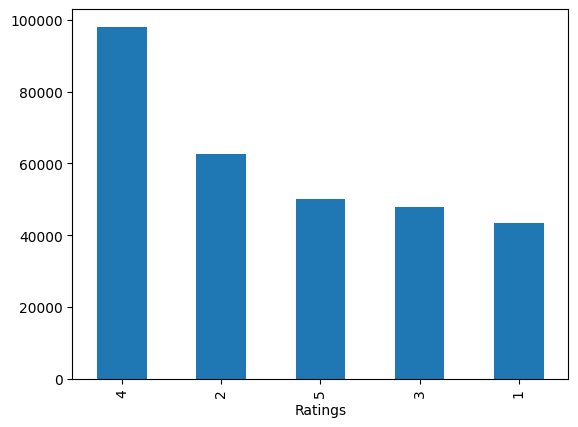

In [26]:
df['Ratings'].value_counts().plot(kind='bar')


hence we get less low rating and more high rating.Hence,overall we perform good 

<Axes: xlabel='Age', ylabel='Density'>

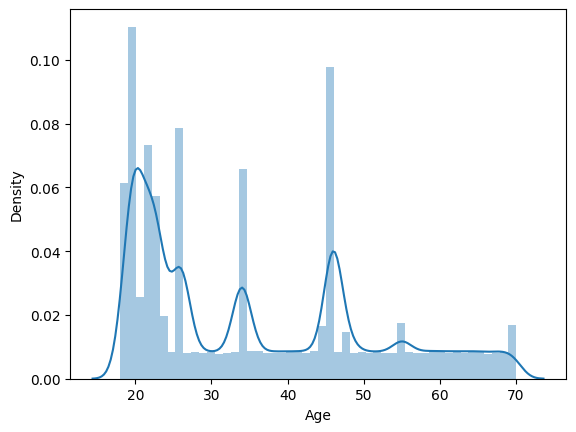

In [27]:
sns.distplot(df['Age'])

 age group come mpst frequently is ( 15 to 25) and then (40 to 50)

Text(0.5, 1.0, 'density of Age')

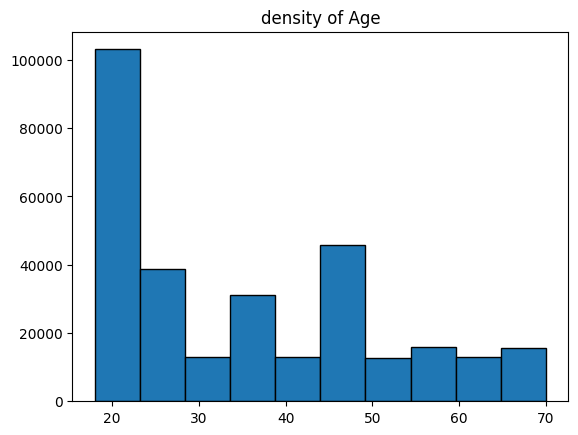

In [28]:
plt.hist(df['Age'],bins=10,edgecolor='black')
plt.title("density of Age")

Text(0.5, 1.0, 'boxplot of ratings')

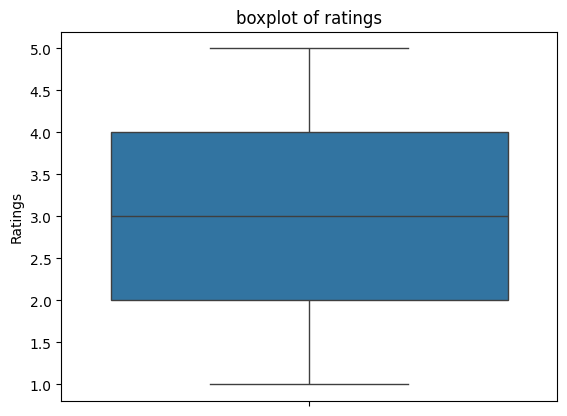

In [29]:
sns.boxplot(df['Ratings'])
plt.title("boxplot of ratings")

the distribution of ratings is approximately normally distributed

<Axes: xlabel='Year', ylabel='Density'>

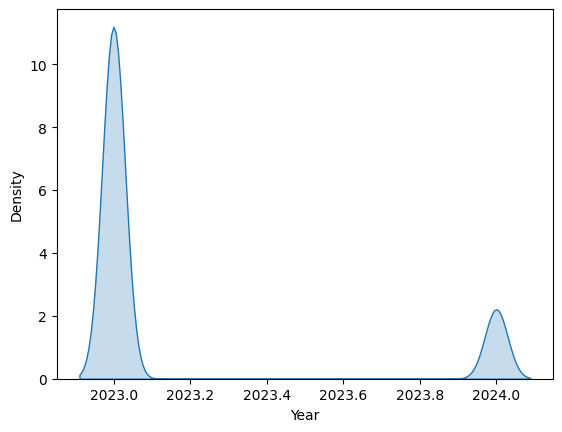

In [84]:
sns.kdeplot(data=df['Year'],shade=True)

categorical

Text(0.5, 1.0, 'GENDER')

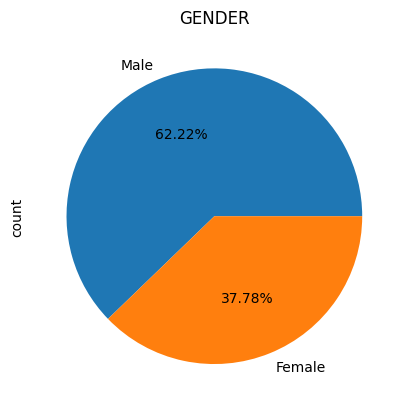

In [30]:
df['Gender'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('GENDER')

MORE MALE CUSTOMER THAN THE FEMALE CUSTOMER

Text(0.5, 1.0, 'income of customer')

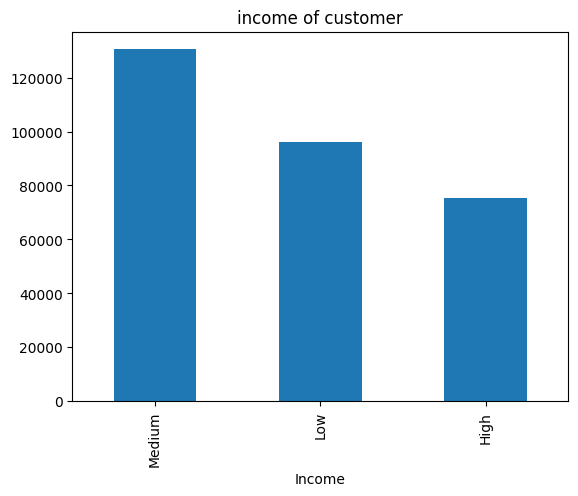

In [31]:
df['Income'].value_counts().plot(kind='bar')
plt.title("income of customer")

Largely customer having medium income and low income come more frequently and hence products of appropiable price used be more in stock

Text(0.5, 1.0, ' no. of customers come in a month')

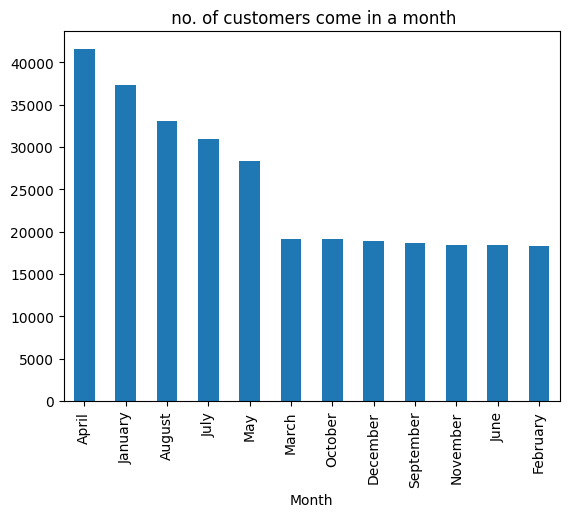

In [32]:
df['Month'].value_counts().plot(kind='bar')
plt.title(" no. of customers come in a month")

So more selling in some month ,so be ready for that and for the month in which selling is low ,try to attrct consumers

Text(0.5, 1.0, 'feedback')

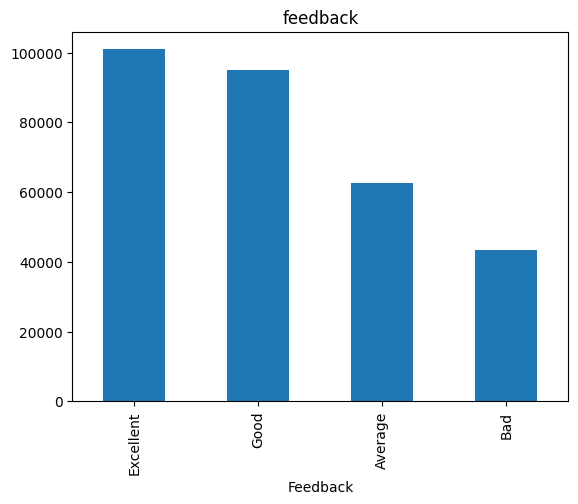

In [33]:
df['Feedback'].value_counts().plot(kind='bar')
plt.title("feedback")

More positive feedback try to maintain this and from negative feedback try to improve and learn from it

Text(0.5, 1.0, 'Payment Methods')

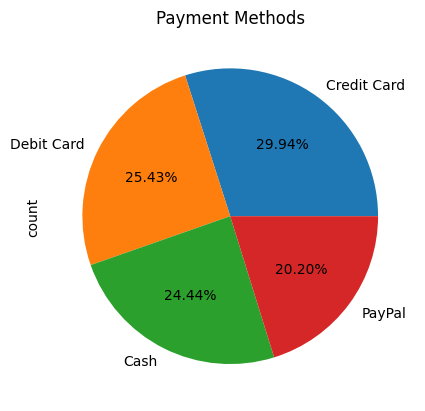

In [34]:
df['Payment_Method'].value_counts().plot(kind="pie",autopct="%1.2f%%")
plt.title('Payment Methods')

So,almost similar percentage of different modes of payment and hence all required measures should be taken so that all modes of payment could be done

In [85]:
df['Country'].value_counts()

Country
USA          95494
UK           63065
Germany      52829
Australia    45318
Canada       45300
Name: count, dtype: int64

<Axes: xlabel='Country'>

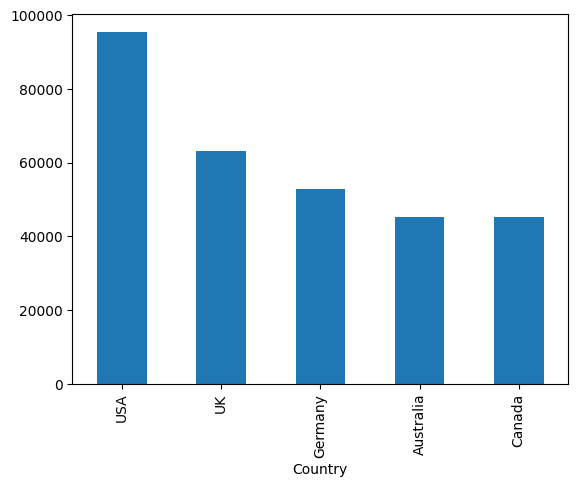

In [86]:
df['Country'].value_counts().plot(kind='bar')





More customers come from USA .Less from Australia and Cananda ,hence there is requirement of advertisement and other required measures to increase customers from this countries.

# Bivariate Analysis

**numerical-numerical**

In [36]:
np.corrcoef(df['Age'],df['Total_Purchases'])

array([[1.        , 0.03327314],
       [0.03327314, 1.        ]])

there is no linear relation between age of the customer and quantity of a product he/she would purchase

In [37]:
a=df.groupby(by=df['Age'])['Total_Purchases'].mean()
a

Age
18    3.002419
19    5.010863
20    5.197618
21    5.414825
22    5.386874
23    5.380192
24    5.468412
25    5.435621
26    5.355721
27    5.570984
28    5.501547
29    5.566535
30    5.422155
31    5.494528
32    5.388933
33    5.551931
34    5.395652
35    5.438971
36    5.483221
37    5.494168
38    5.397983
39    5.510259
40    5.458173
41    5.540270
42    5.423584
43    5.514657
44    5.402951
45    5.500785
46    5.396859
47    5.457471
48    5.432509
49    5.485414
50    5.464713
51    5.595686
52    5.536142
53    5.442655
54    5.519284
55    5.405045
56    5.529412
57    5.462941
58    5.426249
59    5.438943
60    5.495802
61    5.499029
62    5.567062
63    5.445179
64    5.567057
65    5.500381
66    5.433711
67    5.383379
68    5.473960
69    5.432778
70    5.395391
Name: Total_Purchases, dtype: float64

<Axes: xlabel='Age', ylabel='Total_Purchases'>

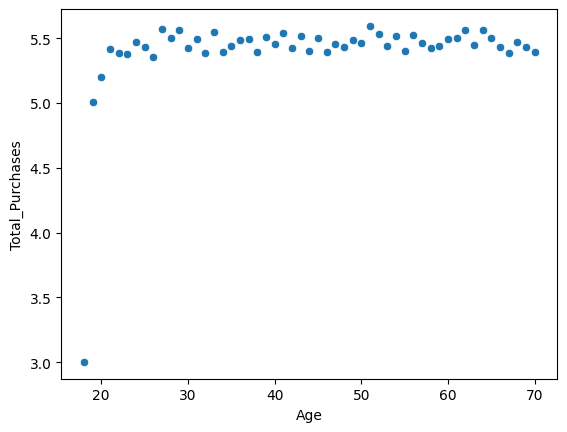

In [38]:
sns.scatterplot(a)

almost, there is no dependence of age of the customer
 on total_purchases i.e, almost all age group
  purshase averagely same quantity of a product
and  avarage is near 5.5 which is very good and 
hence we have to maintain it

In [39]:
b=df.groupby(by=df['Age'])['Ratings'].mean()
b

Age
18    3.208065
19    2.820729
20    2.775881
21    2.912590
22    2.801025
23    2.790107
24    2.927290
25    3.210100
26    3.112521
27    3.201089
28    3.233565
29    3.245276
30    3.251618
31    3.211998
32    3.285375
33    3.258718
34    3.192572
35    3.245563
36    3.206562
37    3.221617
38    3.244375
39    3.220286
40    3.211819
41    3.248170
42    3.218774
43    3.203711
44    3.244798
45    3.231947
46    4.032056
47    3.208812
48    3.363281
49    3.255154
50    3.220208
51    3.223529
52    3.266718
53    3.212490
54    3.227833
55    3.780479
56    3.214801
57    3.234769
58    3.226094
59    3.240134
60    3.256870
61    3.209709
62    3.200994
63    3.238725
64    3.204382
65    3.246382
66    3.221099
67    3.228930
68    3.231173
69    3.262689
70    3.186540
Name: Ratings, dtype: float64

<Axes: xlabel='Age', ylabel='Ratings'>

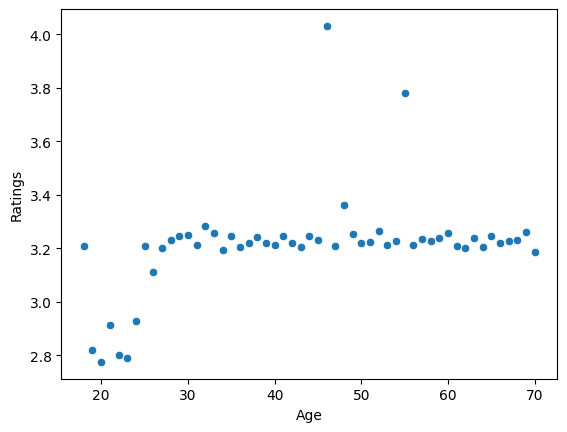

In [40]:
sns.scatterplot(b)


hence ,all customer of different ages avaragely give same ratings which is around 3.2,which shows that we need some improvement may be in quality of product,servising etc

**Categorical-Numerical**

Text(0.5, 1.0, 'Ratings VS Income')

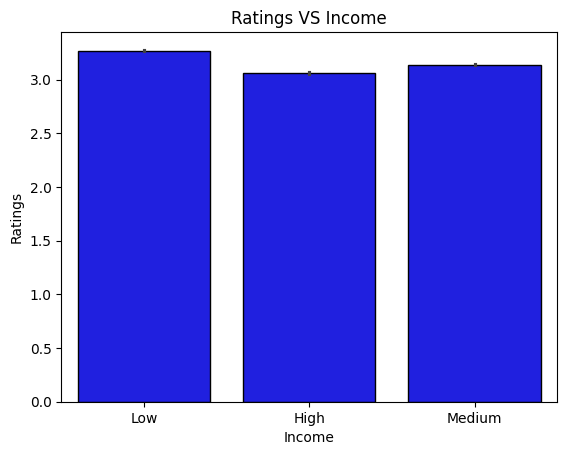

In [41]:
sns.barplot(data=df,x='Income',y='Ratings',edgecolor='black',color='blue')
plt.title("Ratings VS Income")

In [42]:
P=df.loc[df['Income']=='Low','Ratings'].to_numpy()
Q=df.loc[df['Income']=='Medium','Ratings'].to_numpy()
R=df.loc[df['Income']=='High','Ratings'].to_numpy()

In [43]:
f,p=st.f_oneway(P,Q,R)


In [44]:
print("probability that the difference between the ratings given by customer having differnt income is just by random is=",p) 

probability that the difference between the ratings given by customer having differnt income is just by random is= 1.6572963575871092e-242


since probabilty is less that 0.05 hence there is a statistical differnce between them

Text(0.5, 1.0, 'Total purchases by male and female')

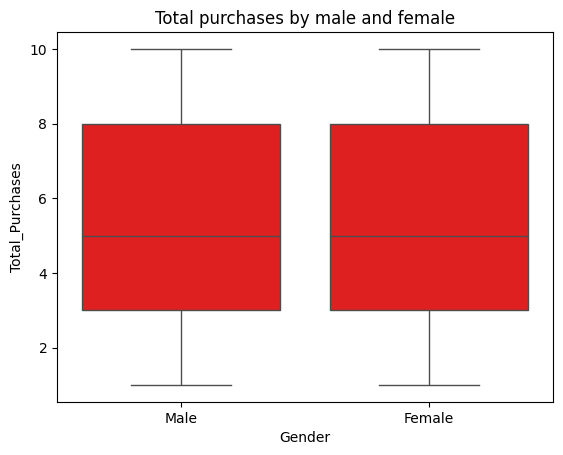

In [45]:
sns.boxplot(data=df,x='Gender',y='Total_Purchases',color='red')
plt.title('Total purchases by male and female')

shows there is no differnce in distribution of quantity of a product purchase by male and female

In [46]:
A=df.loc[df['Gender']=='Male','Total_Purchases'].to_numpy()
B=df.loc[df['Gender']=='Female','Total_Purchases'].to_numpy()

In [47]:
st.ttest_ind(A,B,equal_var=True)

TtestResult(statistic=np.float64(0.05014955426111476), pvalue=np.float64(0.9600032439638765), df=np.float64(302004.0))

since p value is 0.84 which is greater than 0.05 hence there is no statistical differnce between them i.e difference between the total purchases by male and female customer is just by random

In [48]:
df.groupby(by='Product_Brand')['Amount'].mean()

Product_Brand
Adidas               254.021441
Apple                254.200354
Bed Bath & Beyond    255.192063
BlueStar             254.843085
Coca-Cola            254.661429
HarperCollins        253.538822
Home Depot           254.555139
IKEA                 254.164610
Mitsubhisi           254.283462
Nestle               254.470650
Nike                 254.958377
Penguin Books        255.093009
Pepsi                254.899840
Random House         254.975003
Samsung              256.419950
Sony                 255.387740
Whirepool            252.607119
Zara                 254.214154
Name: Amount, dtype: float64

all Product brands almost has same prices for their product

**categorical-categorical**

In [49]:
c=pd.crosstab(df['Customer_Segment'],df['Payment_Method'])
c

Payment_Method,Cash,Credit Card,Debit Card,PayPal
Customer_Segment,,,,
New,22332,27809,23143,17901
Premium,15464,21028,16525,11370
Regular,36011,41575,37122,31726


<Axes: xlabel='Payment_Method', ylabel='Customer_Segment'>

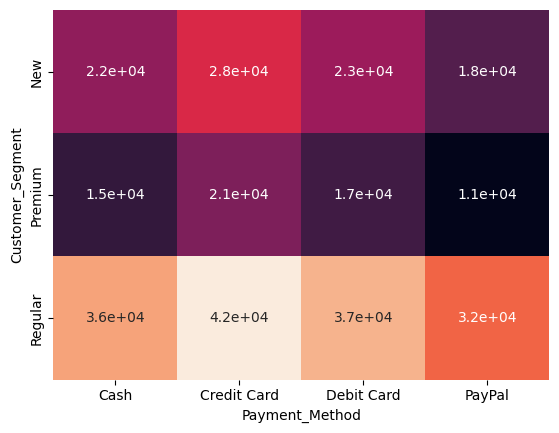

In [50]:
sns.heatmap(c,annot=True,cbar=False)

so our all types of customer uses differnt payment method in almost same proportion,but for all types of customer payment through credit card is most prefered

In [51]:
C2=pd.crosstab(df['Product_Brand'],df['Feedback'])
C2

Feedback,Average,Bad,Excellent,Good
Product_Brand,,,,
Adidas,4090,2982,6399,4765
Apple,4115,2889,6370,4699
Bed Bath & Beyond,4208,2864,6446,4726
BlueStar,0,0,2030,226
Coca-Cola,4203,2946,6482,4761
HarperCollins,4208,2897,6446,4802
Home Depot,4197,2891,6343,4714
IKEA,4089,2805,6235,4865
Mitsubhisi,0,0,2553,4171


<Axes: xlabel='Feedback', ylabel='Product_Brand'>

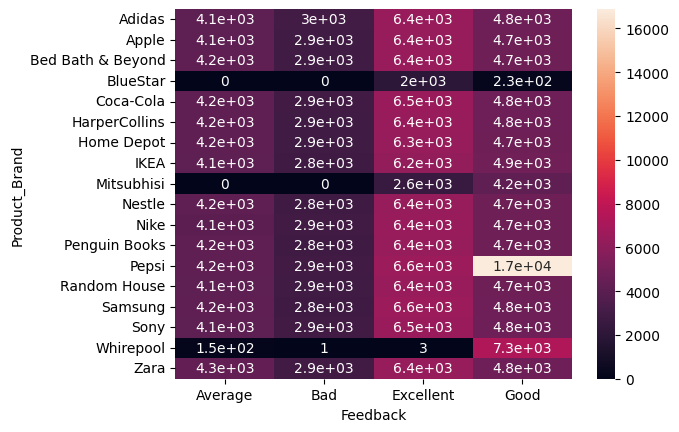

In [52]:
sns.heatmap(C2,annot=True)

For BLUESTAR and MITSUBHISI there is no bad feedback,but less consumer purschase it because its products are electronics which generally as low consumption rate as others.Whirepool get only 3 excellent feedback which need to be improve.For rest of the product it is quite good feedback.For further reducing bad feedbacks we have improve the products  

In [53]:
pd.crosstab(df['Product_Brand'],df['Product_Category'])

Product_Category,Books,Clothing,Electronics,Grocery,Home Decor
Product_Brand,,,,,
Adidas,0,18212,24,0,0
Apple,0,0,18073,0,0
Bed Bath & Beyond,0,0,19,0,18225
BlueStar,0,0,2256,0,0
Coca-Cola,0,0,25,18367,0
HarperCollins,18338,0,15,0,0
Home Depot,0,0,18,0,18127
IKEA,0,0,16,0,17978
Mitsubhisi,0,0,6724,0,0


In [54]:
pd.crosstab(df['Shipping_Method'],df['Product_Type'])

Product_Type,Bathroom,Bedding,BlueStar AC,Children's,Chocolate,Coffee,Decorations,Dress,Fiction,Fridge,...,Shorts,Smartphone,Snacks,Soft Drink,T-shirt,Tablet,Television,Thriller,Tools,Water
Shipping_Method,,,,,,,,,,,,,,,,,,,,,
Express,1977,1985,779,2076,2027,2074,4166,2103,6117,2435,...,2042,6268,2004,4055,4178,4043,4214,2108,1998,8180
Same-Day,2052,2044,1476,2078,2036,2098,4090,2037,6006,2503,...,2109,6151,1937,4098,4071,4119,4115,2104,2016,8243
Standard,1997,1982,1,1993,1988,2006,3922,1983,5922,2507,...,1936,6049,1960,3881,3931,3929,3868,2050,1934,8036


all the products shipped by the different shipping methods in almost same proportion except BLUESTAR AC ,which is mostly shipped on the same day and only 1 time by standard 

In [55]:
pd.crosstab(df['Gender'],df['Product_Category'])


Product_Category,Books,Clothing,Electronics,Grocery,Home Decor
Gender,,,,,
Female,21189,21110,24794,25893,21107
Male,33433,33629,46685,40891,33275


electronics product sell is highest for both male and female 

# CONCLUSION

1.Able to findout ehich type of product get bad feedback so it need to improve and also which type of product was more selected by person on which area so we can improve our marketing stategies

2.Which country wise which types of product more purchased i also find out it.

3.Total amount generated per month for each product category 

4.Which product type sell more and which one sell less

5.Which product category sell less ,which more

**All these answers is mentioned below the plot of each analysis**
